In [1]:
# https://betterexplained.com/articles/intuitive-convolution/
import numpy as np
import matplotlib.pyplot as plt

## Convolution

A mathematical operation on two functions (f and g) that produces a third function (f*g) that expresses how the shape of one is modified by the other.

$$
f*g(x)= \int_{-\infty}^{\infty} f(\tau)g(x - \tau)d\tau
$$

And its discrete analogue - 
$$
f*g(x) = \Sigma_{k = -\infty}^{\infty} f(\tau)g(x - \tau)
$$

## Exmaple 1 - Hospital Dosage

### Scenario 1
Let us assume that a hospital is treating a disease that requires a 3 units of medicine for only a day.
- A patient needs `[3]` units of medicine to cure the disease.
- Frequency of patients for the week is given by `[2, 3, 5, 6, 3]`.

Total number of doses requires to cure all the patients - 

```
Plan  *     Patients      =   Daily Dose
[3]   * [2, 3, 5, 6, 3]   = [6, 9, 15, 18, 9]
```

### Scenario 2
The disease has now mutated and requires multi-day treatment. 
- A patient now needs `[4, 2, 1]` units of medicines for three days respectively.
- The frequency of incoming patients remain the same i.e. `[2, 3, 5, 6, 3]`.

Now the calculation (to find the overall doses) becomes a little tricky as we need to keep track of multiple day medicine plan.

The concept of convolution comes in handy.

We reverse the patient list and create a *queue* so that the first patient comes in last. We also treat medical plan as different room providing different amount of doses for different days.

```
Monday
---------------------------
Rooms                 4 2 1
Patients      3 6 5 3 2 

Usage                 8
```
Two patients come on first day and we use `8` units of medicine.

```
Tuesday
---------------------------
Rooms                  4 2 1
Patients         3 6 5 3 2 

Usage                 12 4         = 16
```
3 new patients come the next day and get there first day of dose meanwhile the previous 2 patients get there second day of dose so total units used on tuesday is 16

Similarly we calculate on other days as well

```
Wednesday
---------------------------
Rooms                  4 2 1
Patients           3 6 5 3 2 

Usage                 20 6 2       = 28
```


```
Thursday
---------------------------
Rooms                  4  2 1
Patients             3 6  5 3 2 

Usage                 24 10 3       = 37
```


```
Friday
---------------------------
Rooms                  4  2 1
Patients               3  6 5 3 2 

Usage                 12 12 5       = 29
```


```
Saturday
---------------------------
Rooms                  4 2 1
Patients                 3 6 5 3 2 

Usage                    6 6       = 12
```


```
Sunday
---------------------------
Rooms                  4 2 1
Patients                   3 6 5 3 2 

Usage                      3       = 3
```


So the per day usage over the period of a week is `[8, 16, 28, 37, 29, 12, 3]`.

This is the convolution of dosage plan and patient list. We have used two functions (plan and patient frequency) to produce a third list which contains a total doses per day.

In [31]:
def pad(x1, x2):
    l1, l2 = len(x1), len(x2)
    num_zeros_x1 = l2 - 1
    num_zeros_x2 = l1 - 1
    return ([0]*num_zeros_x1) + (x1), x2 + ([0]*num_zeros_x2)

def find_num_conv(x1, x2):
    return len(x1) + len(x2) - 1

plan = [4, 2, 1]
patients = [2, 3, 5, 6, 3]
patients = patients[::-1]
num_conv = find_num_conv(plan, patients)
plan, patients = pad(plan, patients)
plan_2, patients_2 = plan[3:].copy(), patients[::-1][2:].copy()
num_dose = []
for i in range(num_conv):
    # print(plan)
    # print(patients)
    num_dose.append(np.sum(np.multiply(plan, patients)))
    # print(num_dose)
    patients = [0] + patients[:-1]
    # print()
num_dose

[8, 16, 28, 37, 29, 12, 3]

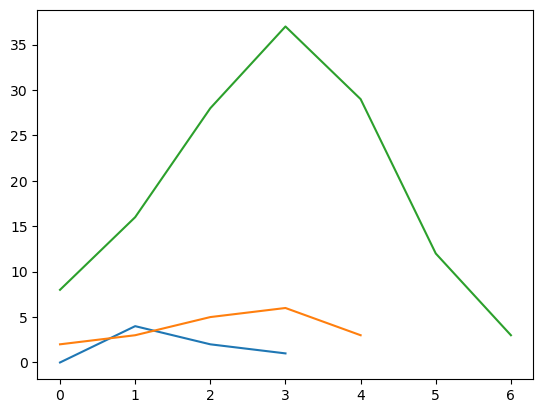

In [33]:
plt.plot(plan_2)
plt.plot(patients_2)
plt.plot(num_dose)

## Integration Calculation 

To convolve a kernel ($f$) with an input signal $g$ - 
- We first reverse the input signal so that the first element in the list $g$ is processed first by sliding it into the kernel $f$. 
- The input signal $g(x)$ now becomes $g(-x)$ and to move to a desired time we add $t$ units to $x$.

So for a given time $t$.
- $f(t)$ is the kernel
- $g(-x + t)$ is the input signal

To get the convolved value at time $t$ we sum (or integrate) over $\forall$ $x$ $\in \{-\infty, \infty\}$.

Hence we get the following formula - 

$$
f*g(x)= \int_{-\infty}^{\infty} f(\tau)g(x - \tau)d\tau
$$

**To convolve a kernel with an input signal: flip the signal, move to the desired time, and accumulate for all the interactions with the kernel.**

